# Bayesian Approach 

## Import Libraries

In [10]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression

%matplotlib inline

## Metric Function

In [11]:
def mape(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def splitter(train, features, target, ts=False):
    if ts:
        trainX, validX, trainY, validY = train_test_split(train[features],
                                                          train[target], test_size=0.3,
                                                          random_state=13, shuffle=False)
    else:
        trainX, validX, trainY, validY = train_test_split(train[features],
                                                      train[target], test_size=0.3,
                                                      random_state=13)
    return trainX, validX, trainY, validY

# First Dataset

In [16]:
train = pd.read_csv("../data/train_period_wise_mean_aggregated.csv")
test = pd.read_csv("../data/test.csv")
test['Period'] = test['Period'].apply(lambda x: int(x.split(":")[1]) + 428)

target = 'EQ'
feat = train.columns.tolist()
feat.remove(target)
# feat.remove("Period")

len(feat), train.shape, test.shape

(38, (429, 39), (39, 39))

## Split the data 

In [17]:
n_samples, n_features = train.shape[0], train.shape[1]

trainX, validX, trainY, validY = splitter(train, feat, target, ts=True)
print(trainX.shape, validX.shape, trainY.shape, validY.shape)

(300, 38) (129, 38) (300,) (129,)


# BayesianRidge Model 

In [18]:
clf = BayesianRidge(compute_score=True)
clf.fit(trainX, trainY)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
train_mape = mape(trainY, clf.predict(trainX))
valid_mape = mape(validY, clf.predict(validX))
test_mape = mape(test[target], clf.predict(test[feat]))

print("Train MAPE : \t{}\nValid MAPE : \t{}\n\nTest MAPE : \t{}\n".format(train_mape, valid_mape, test_mape))

Train MAPE : 	29.09495147109322
Valid MAPE : 	29.421579438504775

Test MAPE : 	153.93261713329238



# Accuracy/Mape of Test Dataset

### Bayesian Ridge Regression got Test MAPE : 153.9

No handles with labels found to put in legend.


Text(0.5, 0, 'Iterations')

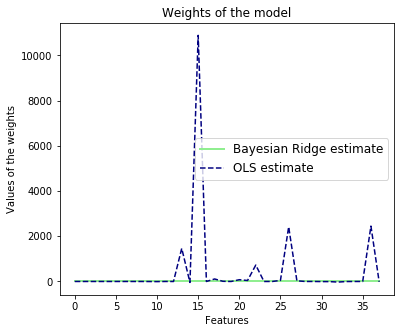

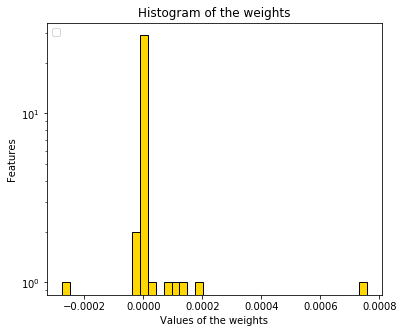

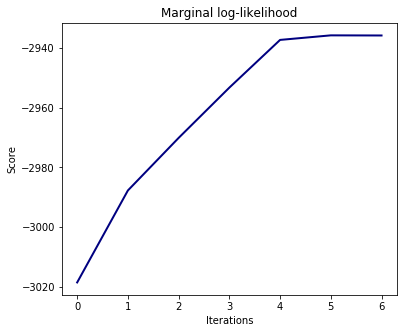

In [5]:
# Plot the graph of weights
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
# plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
# plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.), color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

# Second Dataset

In [22]:
# Import the dataset
train_2 = pd.read_csv("../data/train_2.csv")
test_2 = pd.read_csv("../data/test_2.csv")

train_2.shape, test_2.shape

((34, 39), (5, 39))

In [23]:
# Function to calculate the missing values %
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns

In [24]:
miss_train_2 = missing_values(train_2)
miss_train_2_columns = miss_train_2.index.tolist()
miss_train_2

Your selected dataframe has 39 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
OOH_Working_Cost,27,79.4
OOH_Impressions,24,70.6
Digital_Impressions_pct,24,70.6
Any_Feat_pct_ACV,23,67.6
Magazine_Impressions_pct,22,64.7
TV_GRP,22,64.7
Any_Disp_pct_ACV,12,35.3
Digital_Impressions,11,32.4
Digital_Working_cost,11,32.4
Social_Search_Impressions,10,29.4


In [25]:
missing_values(test_2)

Your selected dataframe has 39 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
Any_Feat_pct_ACV,4,80.0
Magazine_Impressions_pct,4,80.0
TV_GRP,4,80.0
Digital_Working_cost,3,60.0
OOH_Impressions,3,60.0
OOH_Working_Cost,3,60.0
Digital_Impressions,2,40.0
Digital_Impressions_pct,2,40.0
Any_Disp_pct_ACV,2,40.0


In [26]:
# Function to missing values
def get_isnull_features(train, test, null_cols):
    for col in null_cols:
        train['isnull_' + col] = train[col].isnull().map({True: 1, False: 0})
        test['isnull_' + col] = test[col].isnull().map({True: 1, False: 0})

    return train, test

def basic_null_treatment(orig_train, orig_test, cat_cols=None, num_cols=None, cat_treatment="Null", num_treatment="Mean"):
    train = orig_train.copy()
    test = orig_test.copy()
    
    print("Filling Null with 'Null' value")
    null_cols = list(set(
        train.columns[train.isnull().any()].tolist() + test.columns[test.isnull().any()].tolist()))

    # Numerical Columns
    for col in num_cols:
        if num_treatment == "Null":
            train[col].fillna("Null", inplace=True)
            test[col].fillna("Null", inplace=True)
        elif num_treatment == "Mean":
            train[col].fillna(train[col][~train[col].isnull()].mean(), inplace=True)
            test[col].fillna(test[col][~test[col].isnull()].mean(), inplace=True)
        elif num_treatment == "Mode":
            train[col].fillna(train[col].mode()[0], inplace=True)
            test[col].fillna(test[col].mode()[0], inplace=True)
        elif num_treatment == "-1":
            train[col].fillna("-1", inplace=True)
            test[col].fillna("-1", inplace=True)

    print("Total Null\nTrain : {}\nTest : {}".format(train.isnull().sum().sum(), test.isnull().sum().sum()))

    return train, test

In [27]:
train_2_filled, test_2_filled = basic_null_treatment(train_2, test_2, cat_cols=None, num_cols=miss_train_2_columns, cat_treatment="Null", num_treatment="Mean")

Filling Null with 'Null' value
Total Null
Train : 0
Test : 0


In [28]:
missing_values(train_2_filled)

Your selected dataframe has 39 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [29]:
missing_values(test_2_filled)

Your selected dataframe has 39 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [30]:
def convert_period(X):
    year = int(X.split("-")[0].strip())
    period_num = int(X.split(":")[1].strip())
    
    if year == 2016:
        threshold = 0
    elif year == 2017:
        threshold = 13
    elif year == 2018:
        threshold = 26
    
    return period_num + threshold

In [31]:
train_2_filled['Period'] = train_2_filled['Period'].apply(convert_period)
test_2_filled['Period'] = test_2_filled['Period'].apply(convert_period)

In [32]:
# Split the data
n_samples, n_features = train_2_filled.shape[0], train_2_filled.shape[1]

trainX, validX, trainY, validY = splitter(train_2_filled, feat, target, ts=True)
print(trainX.shape, validX.shape, trainY.shape, validY.shape)

(23, 38) (11, 38) (23,) (11,)


In [33]:
# BayesianRidge Model
clf = BayesianRidge(compute_score=True)
clf.fit(trainX, trainY)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
train_mape = mape(trainY, clf.predict(trainX))
valid_mape = mape(validY, clf.predict(validX))
test_mape = mape(test[target], clf.predict(test[feat]))

print("Train MAPE : \t{}\nValid MAPE : \t{}\n\nTest MAPE : \t{}\n".format(train_mape, valid_mape, test_mape))

Train MAPE : 	7.970704235498484
Valid MAPE : 	88.4527716208718

Test MAPE : 	49.97649711334104



# Accuracy/Mape of Test Dataset

### Bayesian Ridge Regression got Test MAPE : 49.976

No handles with labels found to put in legend.


Text(0.5, 0, 'Iterations')

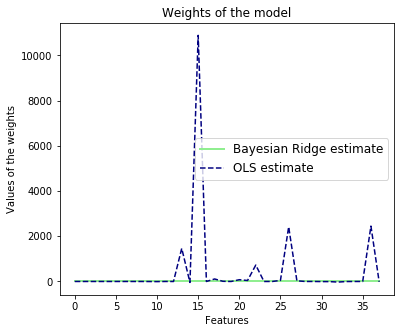

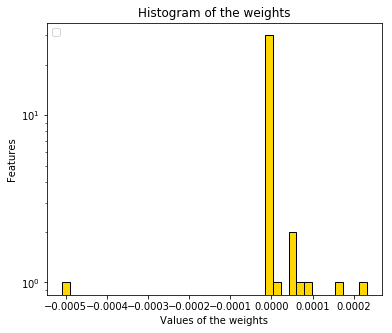

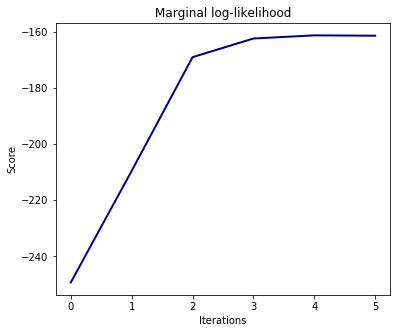

In [35]:
# Plot the graph of weights
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
# plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
# plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.), color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

# RESULT : 

                                                    Bayesian Ridge 
                                            
Dataset | Train | Valid | Test
--- | --- | --- | ---
*First* | 29.09 | 29.42 | 153.9
*Second* | 7.970 | 88.45 | 49.97